In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np

# 5bs_hop-constposition

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/5cp"
# molecule name is a number in these experimets
number = "5"

In [3]:
file = Txt_hop(dir_name, number, "hopcp", first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,26248.85156
1,0.6589,0.0702,23.95740,3.6452,26248.85352
2,-0.3044,-0.0845,24.44130,3.7731,26248.85352
3,-0.0426,-0.0091,23.88150,3.8842,26248.85547
4,-0.5487,0.0625,23.84730,3.8001,26248.85352
...,...,...,...,...,...
87578,-0.6673,-0.3861,65.03815,4.0559,26467.83594
87579,-0.0007,-0.2788,65.24970,4.1519,26467.83594
87580,0.1406,-0.2411,64.96500,4.1771,26467.83789
87581,-0.3620,-0.3194,64.60230,4.0408,26467.83984


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
native_time = []
unfolded_time = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 3.9222433828805725, con deviazione standard = 0.33996786478664665


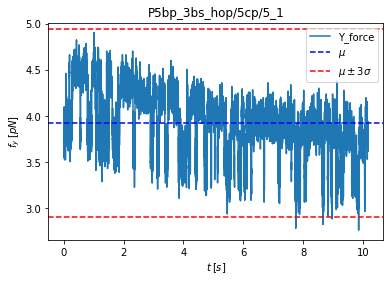

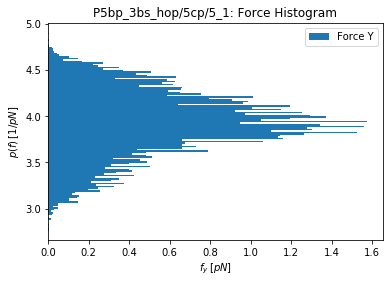

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

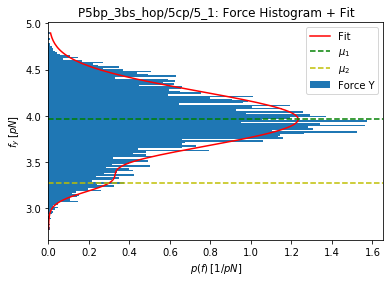

c_1 = 1.2335265415949042, mu_1 = 3.9614480614709615, sigma_1 = 0.30188477117222134
c_2 = 0.2093111421364922, mu_2 = 3.275594955385105, sigma_2 = 0.11401826358798872
sigma_c_1 = 0.028252095161853275, sigma_mu_1 = 0.008728759505288394, sigma_sigma_1 = 0.009909984761678786
sigma_c_2 = 0.04696834369179952, sigma_mu_2 = 0.03090265812835911, sigma_sigma_2 = 0.030691093088396668
w_U = 0.05982141815604821, sigma_w_U = 0.3271110935981707
w_N = 0.9334254503421691, sigma_w_N = 0.0023944907094168577


In [7]:
prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

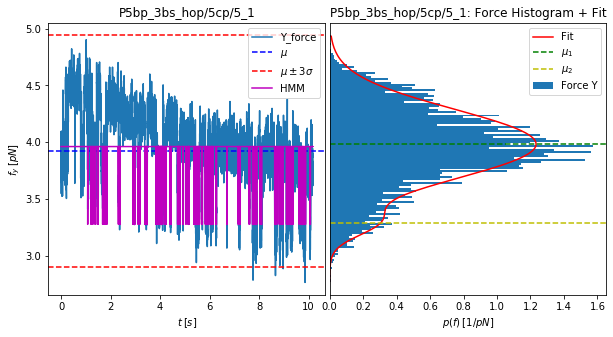

In [9]:
grafici.subplots(fitting_par)

In [10]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 8615 sec nello stato nativo e 1140 sec nello stato unfolded


In [11]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,0.00000
1,0.6589,0.0702,23.95740,3.6452,0.00196
2,-0.3044,-0.0845,24.44130,3.7731,0.00196
3,-0.0426,-0.0091,23.88150,3.8842,0.00391
4,-0.5487,0.0625,23.84730,3.8001,0.00196
...,...,...,...,...,...
9750,-0.5766,-0.3281,23.69180,3.6385,10.16992
9751,-0.4405,-0.3948,23.61900,3.6267,10.16992
9752,-0.0950,-0.2991,23.79905,3.6620,10.16992
9753,0.0254,-0.2034,23.96170,3.6166,10.17188


# File 2

f media vale = 4.181228763507376, con deviazione standard = 0.340360722715491


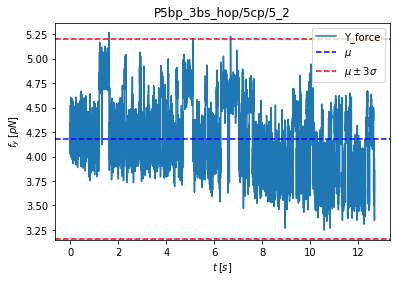

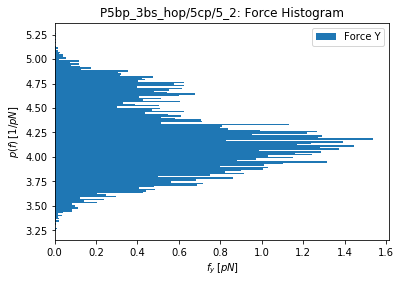

In [12]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

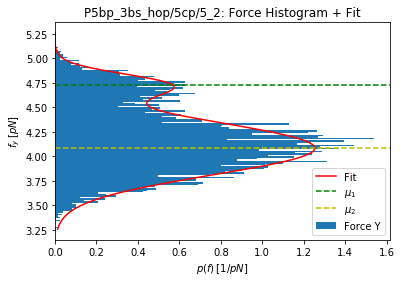

c_1 = 0.4916046081226351, mu_1 = 4.728984853558191, sigma_1 = 0.11692229423301322
c_2 = 1.253574591653427, mu_2 = 4.083083389652075, sigma_2 = 0.2728487116878058
sigma_c_1 = 0.03647421634050144, sigma_mu_1 = 0.01137871238896897, sigma_sigma_1 = 0.0117773220426539
sigma_c_2 = 0.023687474205463518, sigma_mu_2 = 0.006727415288729272, sigma_sigma_2 = 0.007342356494656082
w_U = 0.8573576407921303, sigma_w_U = 0.004737585830505794
w_N = 0.14407983676080047, sigma_w_N = 0.10725837006249303


In [13]:
prova = [0.4, 4.7, 0.1, 1.2, 4.1, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [14]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

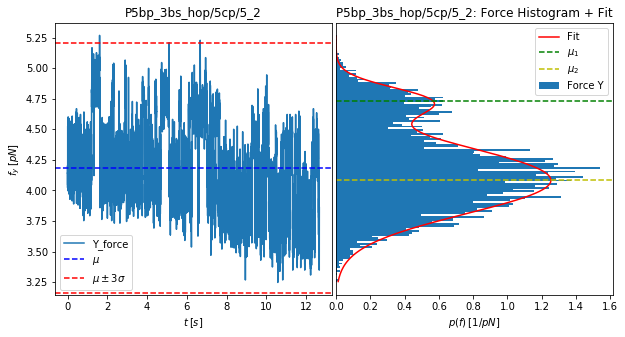

In [15]:
grafici.subplots(fitting_par, False)

In [16]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 2330 sec nello stato nativo e 9670 sec nello stato unfolded


In [17]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0568,-0.2063,55.62405,4.1418,0.00000
1,0.0359,-0.2614,55.16120,4.2024,0.00000
2,0.0097,-0.2585,55.32305,4.0223,0.00196
3,-0.0531,-0.1077,55.42720,4.1771,0.00196
4,0.3448,-0.0961,55.06095,4.0559,0.00391
...,...,...,...,...,...
12118,0.7060,0.1359,55.31250,3.3489,12.66797
12119,1.1038,0.2026,55.05655,3.6519,12.66797
12120,0.7374,0.1881,55.30590,3.6469,12.66993
12121,1.0358,0.1504,55.14095,3.8489,12.66993


# File 3

f media vale = 4.1745962678375355, con deviazione standard = 0.30865529479707404


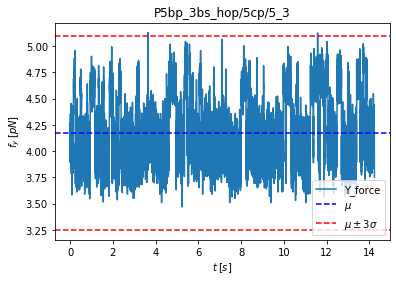

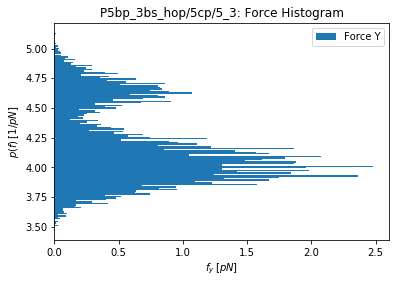

In [18]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

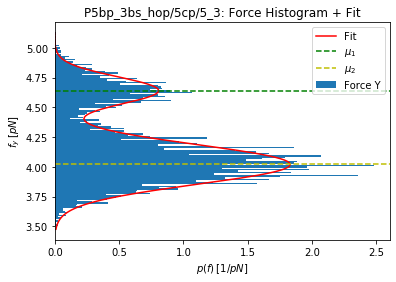

c_1 = 0.8062848263502903, mu_1 = 4.641409478441393, sigma_1 = 0.11605253542520855
c_2 = 1.8316490036495479, mu_2 = 4.020232461934748, sigma_2 = 0.16616112084736498
sigma_c_1 = 0.05739896734766095, sigma_mu_1 = 0.009789168865284918, sigma_sigma_1 = 0.009845215290484804
sigma_c_2 = 0.04710603672737225, sigma_mu_2 = 0.005001430585180348, sigma_sigma_2 = 0.005092949807317275
w_U = 0.7628894363844299, sigma_w_U = 0.009384499970690593
w_N = 0.23454871285808482, sigma_w_N = 0.08448725997599692


In [19]:
prova = [0.7, 4.6, 0.1, 1.8, 4.0, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [20]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

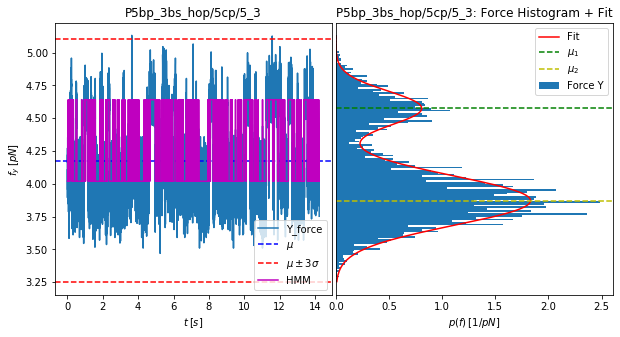

In [21]:
grafici.subplots(fitting_par)

In [22]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 2864 sec nello stato nativo e 9136 sec nello stato unfolded


In [23]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.4128,0.1475,70.22640,4.1064,0.00000
1,0.8264,0.1591,70.44005,3.9751,0.00000
2,0.2191,0.1707,70.78085,3.8943,0.00195
3,0.4425,0.2210,70.39545,4.2310,0.00000
4,0.5611,0.3795,70.13420,4.1771,0.00391
...,...,...,...,...,...
13660,0.4634,-0.2121,65.48650,3.9482,14.23242
13661,0.4006,-0.1927,65.71430,3.8876,14.23242
13662,-0.2468,-0.2324,65.98220,4.0054,14.23242
13663,-0.1316,-0.2527,66.41770,3.8893,14.23438


# File 4

f media vale = 3.571759740259746, con deviazione standard = 0.2626093874775216


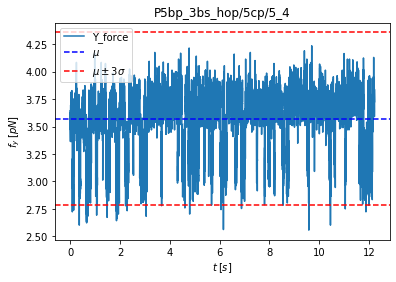

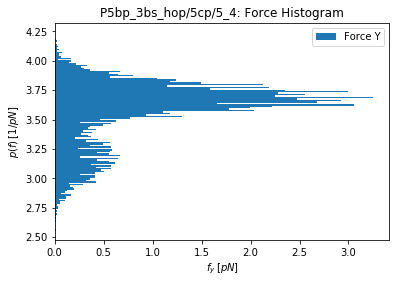

In [24]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

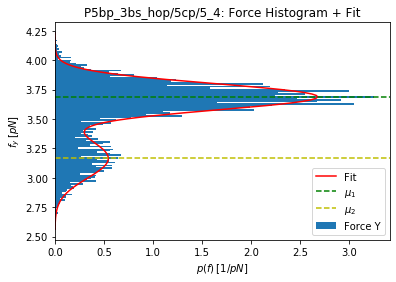

c_1 = 2.677059057243191, mu_1 = 3.6888737874946815, sigma_1 = 0.11234451390945545
c_2 = 0.5442873049682126, mu_2 = 3.163975137989911, sigma_2 = 0.168366690419819
sigma_c_1 = 0.05925007139620924, sigma_mu_1 = 0.0031538090861071132, sigma_sigma_1 = 0.003285707704963466
sigma_c_2 = 0.04807536946518923, sigma_mu_2 = 0.01830523461833307, sigma_sigma_2 = 0.01950721199783309
w_U = 0.229707044544912, sigma_w_U = 0.10983214493212803
w_N = 0.7538757190395086, sigma_w_N = 0.008425016767811388


In [25]:
prova = [2.5, 3.6, 0.1, 0.5, 3.2, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [26]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

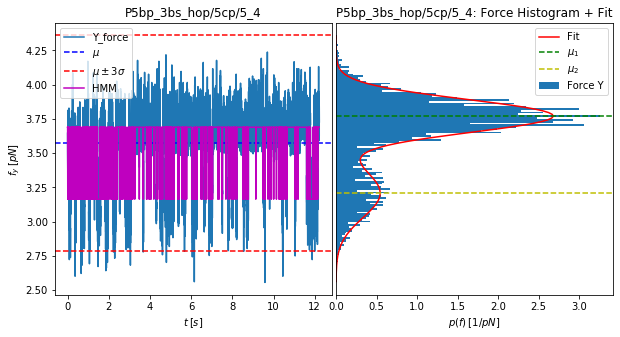

In [27]:
grafici.subplots(fitting_par)

In [28]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 8797 sec nello stato nativo e 2907 sec nello stato unfolded


In [29]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0795,0.1282,34.43440,3.6452,0.00000
1,0.6519,0.0354,34.31250,3.6048,0.00000
2,0.6379,-0.0381,34.32445,3.5442,0.00196
3,0.6693,-0.0207,34.62430,3.5105,0.00196
4,0.4913,-0.1193,34.42005,3.5307,0.00391
...,...,...,...,...,...
11699,0.4215,0.0315,34.78700,3.7664,12.22071
11700,0.5821,0.0973,34.19465,3.8405,12.22071
11701,-0.0391,0.0083,34.78590,3.6317,12.22071
11702,-0.1316,0.0286,34.86950,3.7226,12.22461


# File 5

f media vale = 4.343044472140798, con deviazione standard = 0.2792036875962269


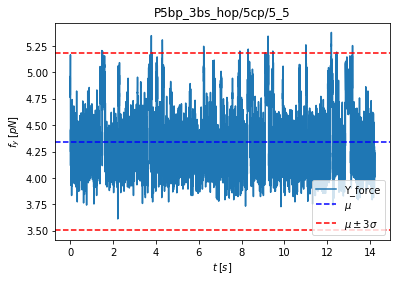

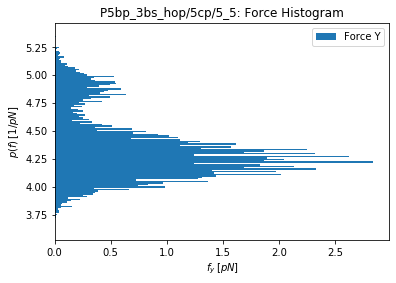

In [30]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

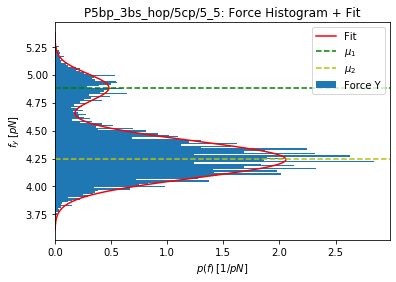

c_1 = 0.4798656881047052, mu_1 = 4.883467088114033, sigma_1 = 0.1248797975297362
c_2 = 2.05881663824931, mu_2 = 4.241152806342971, sigma_2 = 0.16484723850716024
sigma_c_1 = 0.056973467468708246, sigma_mu_1 = 0.017514432183322423, sigma_sigma_1 = 0.017635004162451718
sigma_c_2 = 0.04875182608823472, sigma_mu_2 = 0.004572277616616472, sigma_sigma_2 = 0.004638693097755192
w_U = 0.8507251652206053, sigma_w_U = 0.005524301649563512
w_N = 0.15021102780002035, sigma_w_N = 0.1569541486680556


In [31]:
prova = [0.5, 4.8, 0.1, 2., 4.2, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [32]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

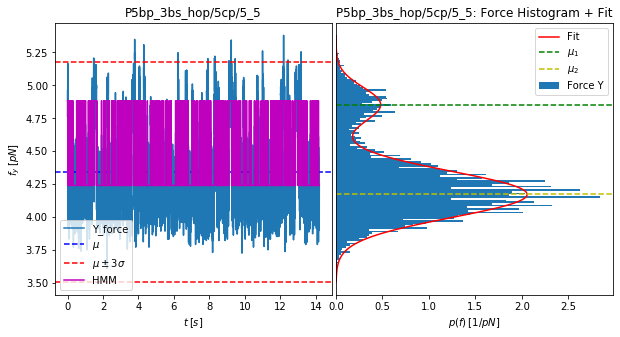

In [33]:
grafici.subplots(fitting_par)

In [34]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 1935 sec nello stato nativo e 10065 sec nello stato unfolded


In [35]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.3866,-0.2208,64.01745,4.9599,0.00000
1,0.4006,-0.1695,63.56275,4.9245,0.00000
2,0.2470,-0.1038,64.27315,4.8909,0.00000
3,0.4390,-0.0787,63.91100,4.7629,0.00195
4,0.8264,-0.1077,64.23520,4.9043,0.00391
...,...,...,...,...,...
13635,0.7322,-0.3194,63.94285,4.1367,14.20117
13636,0.7583,-0.3745,63.85240,4.2428,14.20117
13637,0.2139,-0.4586,64.01660,4.0054,14.20313
13638,-0.1997,-0.3600,64.02660,4.0054,14.20508


# File 6

f media vale = 3.947100949230549, con deviazione standard = 0.3241706722367112


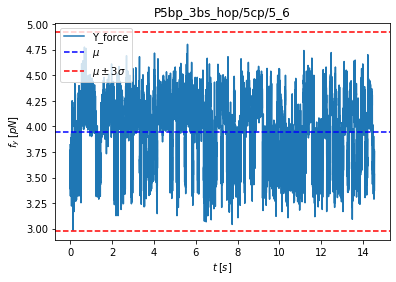

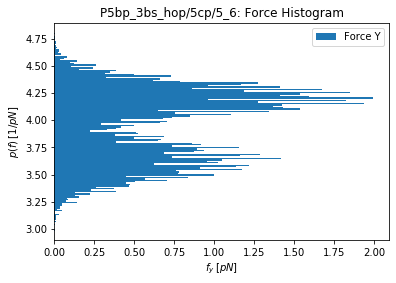

In [36]:
grafici = Graph_hop(dir_name, number, 6)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

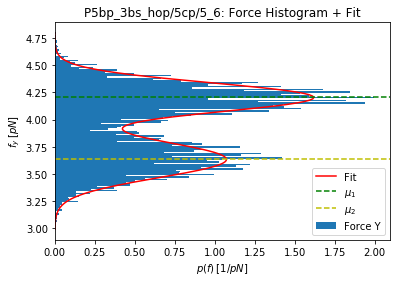

c_1 = 1.615748280978381, mu_1 = 4.203676454153442, sigma_1 = 0.13435702483597323
c_2 = 1.0729684530385941, mu_2 = 3.6335173801666913, sigma_2 = 0.16747644628090497
sigma_c_1 = 0.04813374180610072, sigma_mu_1 = 0.005008882301066762, sigma_sigma_1 = 0.005304987028482601
sigma_c_2 = 0.042452724008332436, sigma_mu_2 = 0.008214063226051243, sigma_sigma_2 = 0.008645208581303599
w_U = 0.4504334394078389, sigma_w_U = 0.03539158447195971
w_N = 0.5441567429194296, sigma_w_N = 0.02227926224797355


In [37]:
prova = [1.7, 4.2, 0.1, 1., 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [38]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

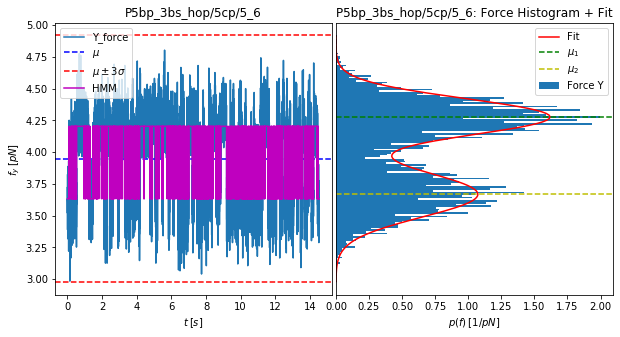

In [39]:
grafici.subplots(fitting_par)

In [40]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 6664 sec nello stato nativo e 5336 sec nello stato unfolded


In [41]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,1.0218,0.2403,42.23420,3.8203,0.00000
1,1.3080,0.1417,42.18325,3.7630,0.00195
2,1.3918,0.0663,42.37205,3.5307,0.00391
3,0.9101,0.0431,42.35340,3.5206,0.00391
4,0.2453,0.0025,42.09780,3.6267,0.00586
...,...,...,...,...,...
13901,0.1144,-0.1106,42.36565,3.3691,14.52930
13902,0.3081,-0.1222,42.10130,3.6519,14.53125
13903,-0.1578,-0.0178,42.29030,3.5610,14.53125
13904,-0.2468,-0.0816,42.35945,3.6166,14.53125


# File 7

f media vale = 3.9170464268960328, con deviazione standard = 0.33191509986558826


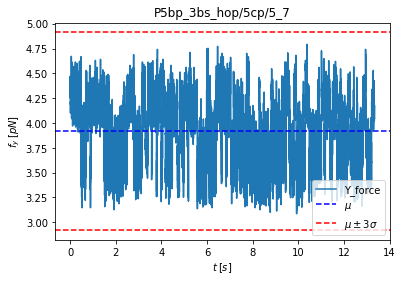

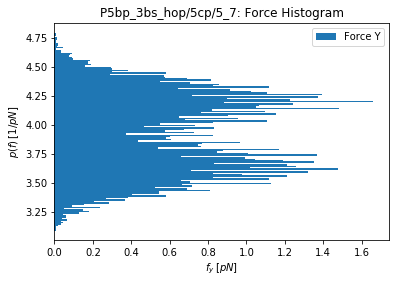

In [42]:
grafici = Graph_hop(dir_name, number, 7)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

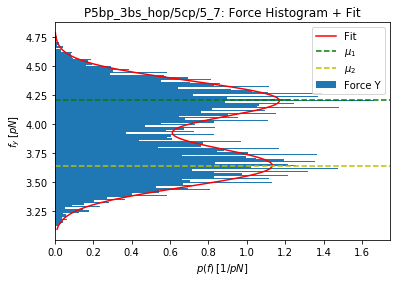

c_1 = 1.1609949144397995, mu_1 = 4.206300819001591, sigma_1 = 0.1674338390685071
c_2 = 1.1293020769775732, mu_2 = 3.640543900597382, sigma_2 = 0.18099947565131025
sigma_c_1 = 0.04077814635836535, sigma_mu_1 = 0.00906374175500507, sigma_sigma_1 = 0.009657866868857183
sigma_c_2 = 0.03840936927430508, sigma_mu_2 = 0.009585852110803194, sigma_sigma_2 = 0.009524960775493339
w_U = 0.5123625492369405, sigma_w_U = 0.03053122060771941
w_N = 0.4872630583754252, sigma_w_N = 0.034601865709102966


In [43]:
prova = [1.4, 4.2, 0.2, 1.2, 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [44]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

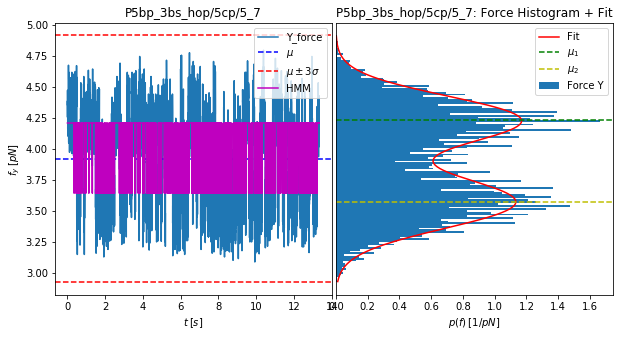

In [45]:
grafici.subplots(fitting_par)

In [46]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 5979 sec nello stato nativo e 6021 sec nello stato unfolded


In [47]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.1683,0.0460,65.94520,4.3791,0.00000
1,0.1563,0.1127,65.86355,4.3539,0.00000
2,0.9730,0.1707,65.60255,4.4599,0.00000
3,0.6589,0.0547,65.54525,4.4397,0.00196
4,0.4844,0.1050,65.90015,4.3185,0.00391
...,...,...,...,...,...
12785,-0.6673,-0.3861,65.03815,4.0559,13.33399
12786,-0.0007,-0.2788,65.24970,4.1519,13.33399
12787,0.1406,-0.2411,64.96500,4.1771,13.33594
12788,-0.3620,-0.3194,64.60230,4.0408,13.33789


In [48]:
forces_average

[3.6185215084280333,
 4.406034121605133,
 4.33082097018807,
 3.426424462742296,
 4.562309947228502,
 3.9185969171600665,
 3.9234223597994866]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

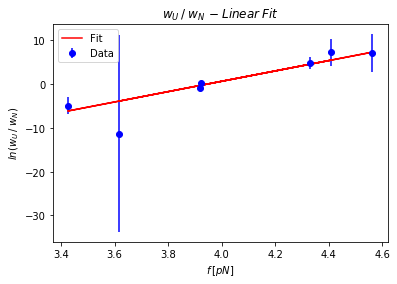

La forza di coesistenza vale f_c = 3.9433005143445006, con sigma = 1.0900618522847823
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = -11.838912989337198, con sigma = 2.3174767583253435
La differenza di energia libera DeltaG_NU = -46.68439168013316, con sigma = 9.11210812286662


In [49]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

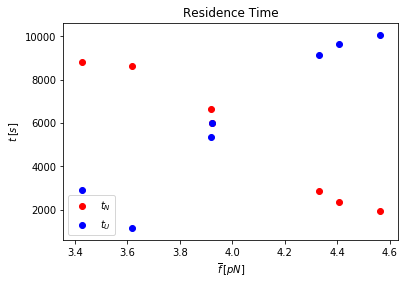

In [50]:
grafici.residence_time(native_time, unfolded_time, forces_average)

# O sono due molecole diverse?

In [51]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [52]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 0)
w_U = remove_element(w_U, 0)
w_N = remove_element(w_N, 0)
sigma_w_U = remove_element(sigma_w_U, 0)
sigma_w_N = remove_element(sigma_w_N, 0)
native_time = remove_element(native_time, 0)
unfolded_time = remove_element(unfolded_time, 0)

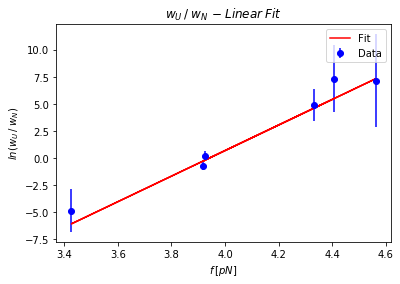

La forza di coesistenza vale f_c = 3.9432459645246767, con sigma = 1.0929060626529792
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = -11.814190249238834, con sigma = 2.3186760833270794
La differenza di energia libera DeltaG_NU = -46.58625802443782, con sigma = 9.11691398568484


In [53]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [54]:
f_c

(3.9432459645246767, 1.0929060626529792)

In [55]:
G0 = grafici.G0(f_c[0])

DeltaG0 = -19.36720035046565, con sigma = None


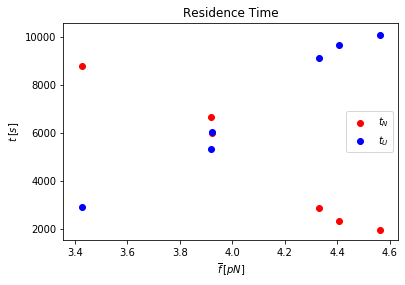

In [56]:
grafici.residence_time(native_time, unfolded_time, forces_average)